In [216]:
import pandas as pd
import numpy as np
import requests
import io
import time
from sklearn import preprocessing
import matplotlib as mp
from matplotlib.pyplot import figure
import hampel
from scipy import stats



In [217]:
with open('../messari.txt', 'r') as file:
    API_KEY = file.read().replace('\n', '')

In [218]:
url = "https://data.messari.io/api/v1/"
headers = { 'Content-type': 'application/json', "x-messari-api-key": API_KEY}
payload = {}

In [219]:
r = requests.get(url + 'markets',params=payload, headers = headers).json()

In [220]:
market_data = []

for x in range(3):
    
    dataset_all_json = requests.get(url + 'markets',params=payload, headers = headers).json()
    number_of_entries = len(dataset_all_json['data'])

    for x in range(0, number_of_entries):
        market_data.append(dataset_all_json['data'][x])

markets = pd.DataFrame(market_data)

In [221]:
markets.head()

,id,exchange_id,base_asset_id,quote_asset_id,trade_start,trade_end,version,excluded_from_price,exchange_name,exchange_slug,base_asset_symbol,quote_asset_symbol,pair,price_usd,vwap_weight,volume_last_24_hours,has_real_volume,deviation_from_vwap_percent,last_trade_at
0,0001be7f-a9af-4c10-ac4d-ed3a7f1c8593,63f8b808-0960-4bb1-bb19-07a0dc779976,77522ba6-dd4c-4cb6-9d34-4c2cd11ac2d6,5da7bde4-61e9-4a6f-9fc3-7ed66effb198,None,None,1,True,PancakeSwap,pancakeswap,RPG,BUSD,RPG-BUSD,NaN,1,NaN,True,NaN,None
1,00029600-7335-4a57-94ff-87beffaf8b97,65d7db09-764a-41a8-ac63-50a2d296f874,e23572af-c451-4bed-a085-361f9c207589,4d7b4b96-ecd1-47f7-b8ec-c054dd78b7ed,None,None,1,True,Uniswap (v3),uniswap-v3,QBU,WETH,QBU-WETH,NaN,1,NaN,True,NaN,None
2,0002b156-531b-4827-91c9-89ccc6a123af,90bffaa1-cb56-4647-afb5-e67308bd9595,f5f2202c-e28e-460e-a2a2-92bf3951c372,33f4a7e6-c4de-4883-bffb-d5f2119d55c6,None,None,1,True,SpookySwap,spookyswap,ASHARE,7SHARE,ASHARE-7SHARE,0.046760,1,0.008175,True,10.569420,2022-06-25T03:00:00Z
3,00030799-f441-4b8e-a327-889537d4c62a,19e0fd2a-2226-4552-80da-749a66953588,a3b64831-4288-48bd-a3e7-eb4f77f6f740,938dec5f-c021-42a3-95da-6cece8497dc9,None,None,1,True,Curve,curve,DAI,ALUSD,DAI-ALUSD,0.998371,1,166688.545444,True,-0.197417,2022-06-30T19:04:00Z
4,00053875-e43a-4fd3-b68d-c8a032986bbe,63f8b808-0960-4bb1-bb19-07a0dc779976,98719313-ca66-404e-bcf1-afece03034f0,24c59e3e-73b0-4872-94e4-3e5959c315a6,None,None,1,True,PancakeSwap,pancakeswap,BLOVELY,WBNB,BLOVELY-WBNB,NaN,1,NaN,True,NaN,None


In [239]:
metric = 'close'

In [241]:
# btc data

headers = { 'Content-type': 'application/json', "x-messari-api-key": API_KEY}
payload = {'start':'2020-01-01', 'end':'2022-01-01','interval':'1d','format':'csv','columns':metric}
priceData = requests.get(url + 'assets/bitcoin/metrics/price/time-series',params=payload, headers = headers).content

In [242]:
btc = pd.read_csv(io.StringIO(priceData.decode('utf-8')))
btc

,timestamp,close
0,2020-01-01T00:00:00Z,7181.337264
1,2020-01-02T00:00:00Z,6947.972833
2,2020-01-03T00:00:00Z,7334.642937
3,2020-01-04T00:00:00Z,7342.932133
4,2020-01-05T00:00:00Z,7353.340005
...,...,...
727,2021-12-28T00:00:00Z,47549.767421
728,2021-12-29T00:00:00Z,46471.421581
729,2021-12-30T00:00:00Z,47127.703577
730,2021-12-31T00:00:00Z,46209.113946


In [243]:
volDataBTC = requests.get(url + 'assets/uniswap/metrics/price/time-series',params=payload, headers = headers).content
vol_all = pd.read_csv(io.StringIO(volDataBTC.decode('utf-8')))
vol_all.rename(columns = {metric:'btc'}, inplace = True)

In [244]:
vol_all.head()

,timestamp,btc
0,2020-09-17T00:00:00Z,3.475466
1,2020-09-18T00:00:00Z,6.913449
2,2020-09-19T00:00:00Z,5.723322
3,2020-09-20T00:00:00Z,5.221194
4,2020-09-21T00:00:00Z,4.248011


In [245]:
payload = {'start':'2020-01-01', 'end':'2022-01-01','interval':'1d','format':'csv','columns':metric}
tokens = ['ethereum','binance-coin','bitcoin','dogecoin','solana','cardano','uniswap','avalanche','polygon','chainlink','stellar','near-protocol','fantom','kucoin','curve','defichain','1inch','harmony','lido-dao','axie-infinity','aave','filecoin','thesandbox']

In [246]:
for token in tokens:
    time.sleep(5) #timer to circumwent API limits
    volData = requests.get(url + 'assets/'+ token + '/metrics/price/time-series',params=payload, headers = headers).content
    vol = pd.read_csv(io.StringIO(volData.decode('utf-8')))
    vol.rename(columns = {metric:token}, inplace = True)
    vol_all = vol_all.merge(vol, how='outer', on='timestamp')

In [247]:
vol_all.tail()

,timestamp,btc,ethereum,binance-coin,bitcoin,dogecoin,solana,cardano,uniswap,avalanche,...,kucoin,curve,defichain,1inch,harmony,lido-dao,axie-infinity,aave,filecoin,thesandbox
727,2020-09-12T00:00:00Z,NaN,387.926046,28.510696,10443.551610,0.002816,3.334722,0.097709,NaN,NaN,...,NaN,2.100589,NaN,NaN,0.007859,NaN,NaN,NaN,36.094660,0.049171
728,2020-09-13T00:00:00Z,NaN,366.429070,31.163840,10331.928536,0.002784,3.262501,0.095077,NaN,NaN,...,NaN,1.909631,NaN,NaN,0.007421,NaN,NaN,NaN,37.312256,0.043606
729,2020-09-14T00:00:00Z,NaN,377.271924,31.268696,10675.892813,0.002792,3.265357,0.096661,NaN,NaN,...,NaN,1.842538,NaN,NaN,0.007073,NaN,NaN,NaN,38.294065,0.046380
730,2020-09-15T00:00:00Z,NaN,364.145187,27.119506,10787.421911,0.002826,2.931504,0.093174,NaN,NaN,...,NaN,1.415714,NaN,NaN,0.006637,NaN,NaN,NaN,39.540326,0.042212
731,2020-09-16T00:00:00Z,NaN,365.220411,27.876770,10957.548124,0.002808,2.534907,0.091544,NaN,NaN,...,NaN,1.281376,NaN,NaN,0.006178,NaN,NaN,NaN,47.246293,0.044245


In [269]:
# create pct change df

pct_change_df = vol_all.drop(['timestamp'], axis=1).pct_change(periods=1)

In [270]:
# remove outliers
#pct_change_df.fillna(axis='columns',value=0, inplace=True)

#pct_change_df = pct_change_df[(np.abs(stats.zscore(pct_change_df)) < 3).all(axis=1)]


In [271]:
pct_change_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 731
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   btc            731 non-null    float64
 1   ethereum       731 non-null    float64
 2   binance-coin   731 non-null    float64
 3   bitcoin        731 non-null    float64
 4   dogecoin       731 non-null    float64
 5   solana         731 non-null    float64
 6   cardano        731 non-null    float64
 7   uniswap        731 non-null    float64
 8   avalanche      726 non-null    float64
 9   polygon        731 non-null    float64
 10  chainlink      731 non-null    float64
 11  stellar        731 non-null    float64
 12  near-protocol  704 non-null    float64
 13  fantom         731 non-null    float64
 14  kucoin         508 non-null    float64
 15  curve          731 non-null    float64
 16  defichain      634 non-null    float64
 17  1inch          632 non-null    float64
 18  harmony   

In [272]:
pct_change_df = pct_change_df.rolling(30).mean()
#pct_change_df["moving_average_ethereum"] = pct_change_df['ethereum'].rolling(14).mean()
#pct_change_df["moving_average_ethereum"] = pct_change_df['ethereum'].rolling(14).mean()


<AxesSubplot:>

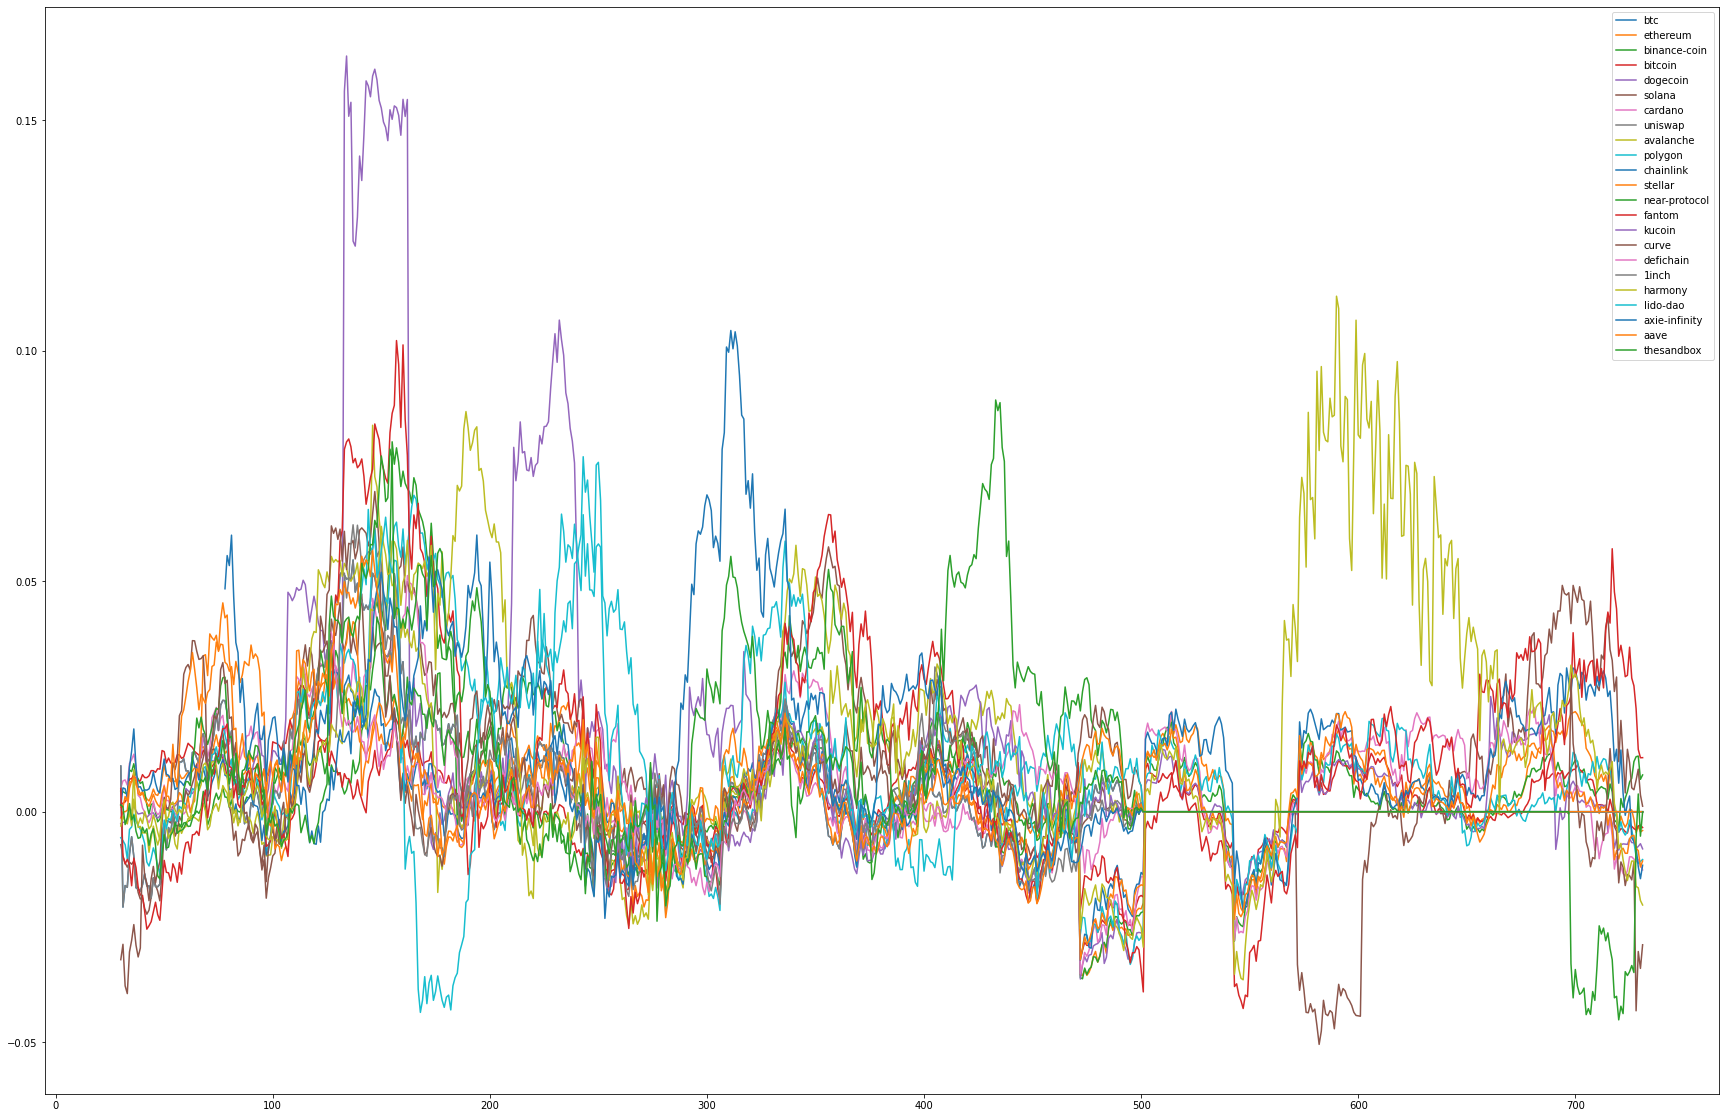

In [274]:
#pct_change_df[['solana', 'avalanche']].plot(figsize=(30, 20))
pct_change_df.drop(['filecoin'], axis=1).plot(figsize=(30, 20))

In [253]:
scaler = preprocessing.MinMaxScaler()
names = vol_all.drop(['timestamp'], axis=1).columns
d = scaler.fit_transform(vol_all[names])
scaled_df = pd.DataFrame(d, columns=names)
#scaled_df.fillna(axis='columns',value=0, inplace=True)


In [254]:
scaled_df.dropna(axis='columns', inplace=True)

scaled_df.head()

,ethereum,binance-coin,bitcoin,dogecoin,cardano,polygon,chainlink,stellar,fantom,harmony
0,0.059684,0.026643,0.097264,0.001860,0.023999,0.004285,0.183541,0.068257,0.007831,0.012673
1,0.058624,0.027448,0.097144,0.001831,0.022937,0.004500,0.165297,0.065186,0.011661,0.012807
2,0.058790,0.026790,0.099487,0.001835,0.023089,0.004427,0.165862,0.065574,0.011813,0.012775
3,0.055768,0.025474,0.096928,0.001803,0.022395,0.004776,0.158229,0.063248,0.010219,0.011462
4,0.049214,0.020672,0.088876,0.001555,0.019151,0.003717,0.137977,0.053333,0.011045,0.010184


<AxesSubplot:>

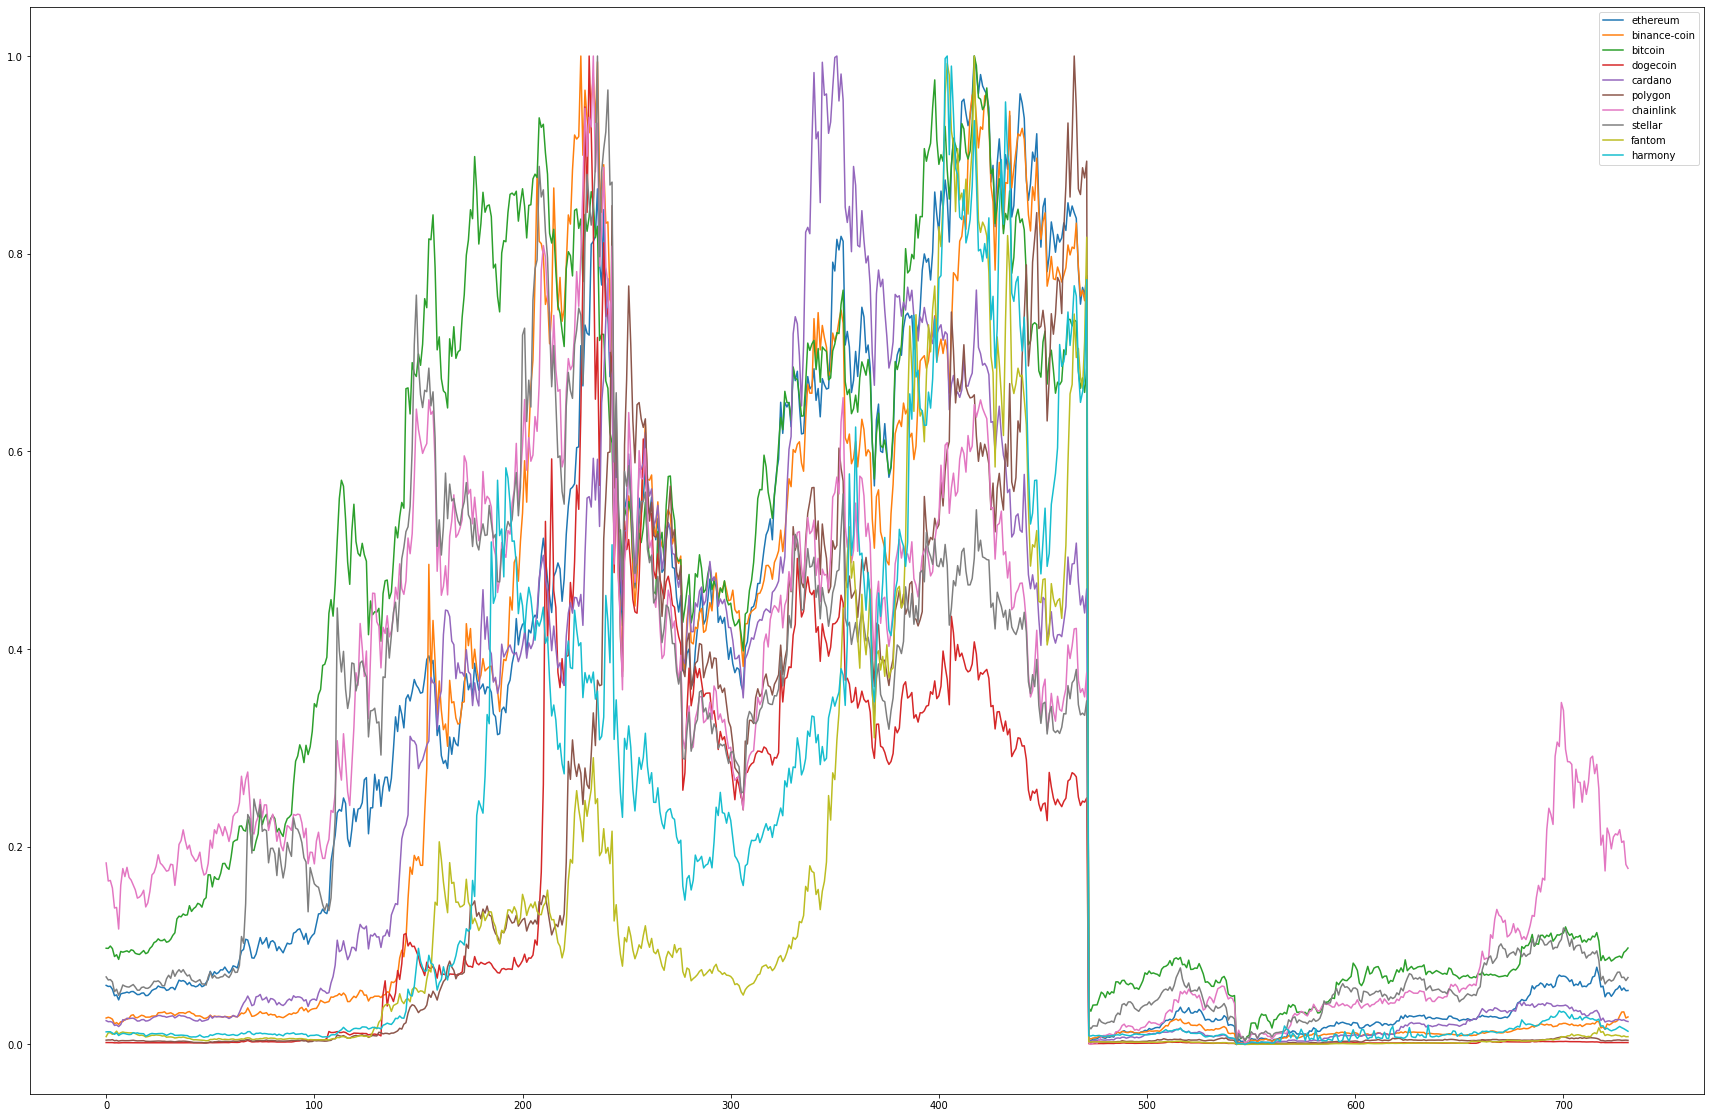

In [255]:
scaled_df.plot(figsize=(30, 20))